# SATURNN and its approximation by a Kernel Logistic Regression applied to a simulated data

**References for this algorithm** :

(English)

Marie Guyomard, Susana Barbosa, Lionel Fillatre, Kernel Logistic Regression Approximation of an Understandable ReLU Neural Network, International Conference on Machine Learning (ICML), 2023.

Marie Guyomard, Susana Barbosa, Lionel Fillatre, Understandable ReLU Neural Network for signal classification, International Conference on Acoustics, Speech, and Signal Processing (ICASSP), 2023.

(French)

Marie Guyomard, Susana Barbosa, Lionel Fillatre, R ́egression Logistique à Noyau équivalente à un Réseau de Neurones Interprétable, Groupe de Recherche et d’Etudes de Traitement du Signal et des Images (Gretsi), 2023.

Marie Guyomard, Susana Barbosa, Lionel Fillatre, Approximation d’un Réseau de Neurones ReLU interprétable par une Régression Logistique à Noyau, Journées de la Statistique (JDS), 2023.

## Import the functions

In [1]:
run SATURNN_functions.ipynb

## Simulated Data

In [2]:
from sklearn.datasets import make_circles

In [3]:
np.random.seed(407)
X, Y = make_circles(n_samples=400, factor=0.5, noise=0.2, random_state=1)
X = pd.DataFrame(X, columns=['X1','X2'])

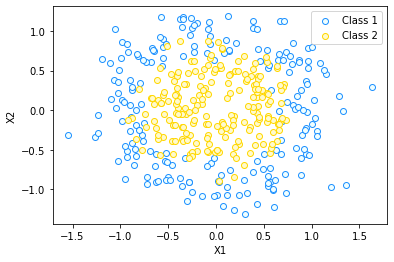

In [4]:
plt.scatter(X.loc[np.where(np.array(Y)==0)[0], 'X1'], X.loc[np.where(np.array(Y)==0)[0], 'X2'], edgecolor='dodgerblue', color='azure')
plt.scatter(X.loc[np.where(np.array(Y)==1)[0], 'X1'], X.loc[np.where(np.array(Y)==1)[0], 'X2'], edgecolor='gold', color='lemonchiffon')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(['Class 1', 'Class 2'])

## SATURNN

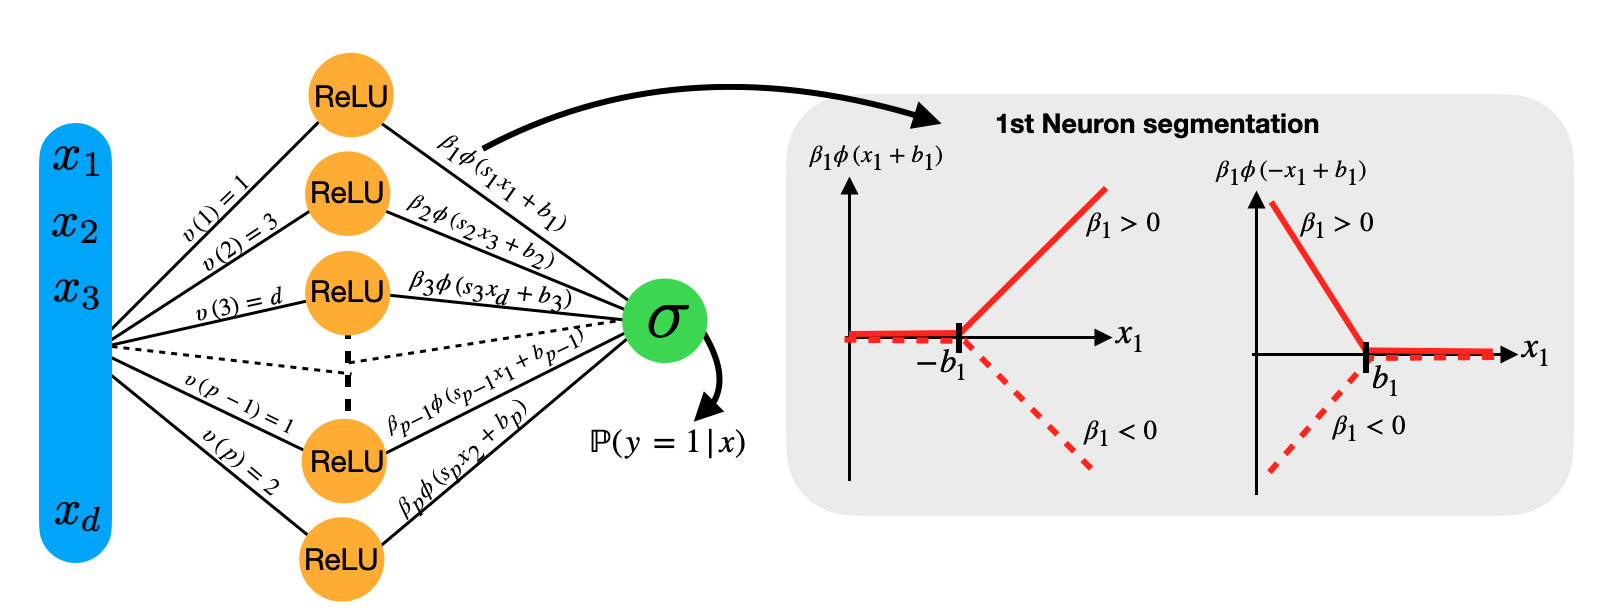

In [5]:
from IPython import display
display.Image('Schema_SATURNN.png', width=2000)

**Modeling**

The SATURNN is a 1-Layer Neural Network for classification:
$$\Phi^\text{SATURNN}(x,\theta) = \sigma(\psi(x, \theta)),$$
with 
$\sigma$ the sigmoid activation:
$$\sigma(x) = \frac{1}{1+\exp(-x)},$$
and $\psi(x,\theta)$ the score function defined by :
$$\psi(x, \theta) = \frac{1}{\sqrt p} \left[ \beta_0 + \sum_{k=1}^p \beta_k \phi(s_kx_{\upsilon(k)} + b_k) \right],$$
with $\theta = [\beta^T, b^T]^T \in \mathbb{R}^{2p+1}$ are the trainable parameters and $x^T$ is the transpose of $x$ such that $x \in \mathcal{B}_2^d(0,r)$, $r>0$.

For the neuron $k$, we have:
- $\upsilon_k = \{1,\ldots,d\}$ is the input selector indicating which feature is handled by the neuron
- $b_k$ is the threshold from which the non-linear effect will be created
- $s_k = \{-1,1\}$ indicates if the non-linear effect will be created on the left or on the right of the treshold $b_k$
- $\beta_k$ indicates the impact of the non-linear effect on the estimated probability



**Initialization Process**


For all $k \in \{1, \dots, p\}$:
- Fixed Parameters after initialization
    - $\upsilon_k(x) \sim \mathcal{U}[\![ 1, d]\!]$
    - $s_k \sim \mathcal{B}(1/2)$
- Trainable parameters : $\theta^{(0)} = [\beta_0^{(0)}, \beta_1^{(0)}, \dots, \beta_p^{(0)}, b_1^{(0)}, \dots, b_p^{(0)}]$
    - $b_k \sim \mathcal{U}[-r, r]$
    - $\beta_k \sim \mathcal{N}(0,1)$
    
    
    
    
**Learning of the SATURNN**

Learning SATURNN requires to minimize the following cost function:
$$\mathcal{L}^{\text{SATURNN}}(\theta)= \frac{1}{N} \sum_{i=1}^N L\left(\sigma(\psi(x^{(i)}, \theta)), y^{(i)}\right),$$
such that
$$\hat{\theta}^{\text{SATURNN}} = \arg\min_{\theta \in \mathcal{B}_2^{2p+1}(\theta^{(0)}, R)}   \mathcal{L}^{\text{SATURNN}}(\theta),$$
with $L(\cdot)$ the binary cross-entropy used for binary classification tasks 
$$L\left(\hat{y}, y\right)=-y\log(\hat{y})-(1-y)\log(1-\hat{y}).$$



### Cross Validation over 5-folds

Parameters:
- nb_neurons : number of neurons composing the SATURNN
- normalisation : information about the data normalization {min_max, mean_sd, None}
- r : the radius of the open ball on which the data lie
- nb_folds : number of folds
- epoch : number of iterations for the training
- learning_rate : step of the gradient descent
- l2_reg : $\ell_2$-regulariation. The higher the parameter is, the more the model will be constrained such that the estimated parameters satys closed to the initialized ones

In [6]:
nb_neurons = 10
normalisation = 'min_max'
r = 1
nb_folds = 5
epoch = 20000
learning_rate = 1e-1
l2_reg = 0

  0%|          | 0/5 [00:00<?, ?it/s]/home/guyomard/.conda/envs/calcul/lib/python3.6/site-packages/ipykernel_launcher.py:96: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


Epochs:   0%|          | 0/20000 [00:00<?, ?it/s]

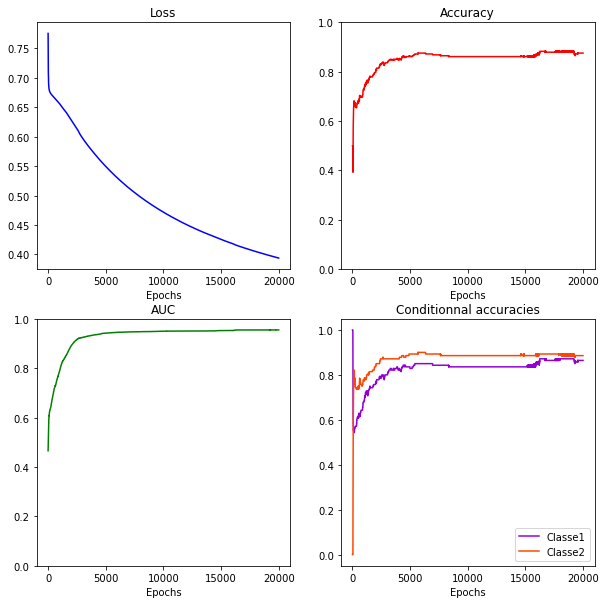

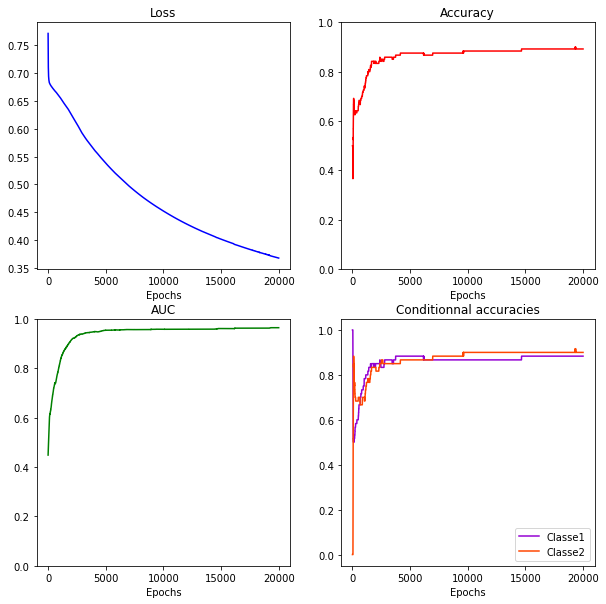

 20%|██        | 1/5 [03:46<15:06, 226.53s/it]/home/guyomard/.conda/envs/calcul/lib/python3.6/site-packages/ipykernel_launcher.py:96: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


Epochs:   0%|          | 0/20000 [00:00<?, ?it/s]

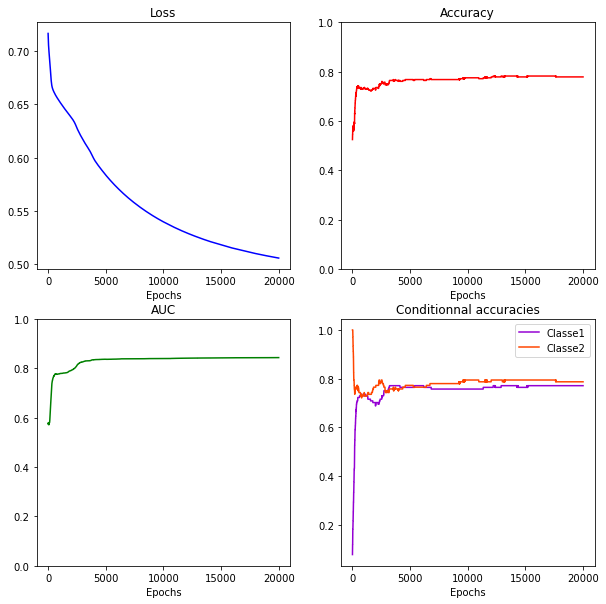

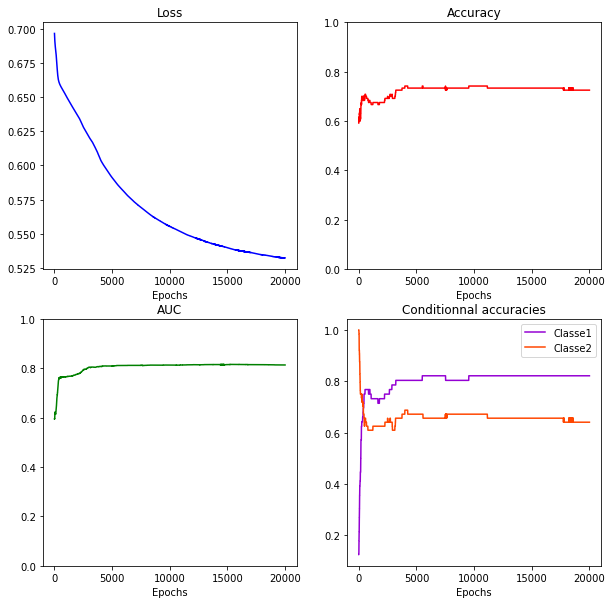

 40%|████      | 2/5 [07:58<12:04, 241.54s/it]/home/guyomard/.conda/envs/calcul/lib/python3.6/site-packages/ipykernel_launcher.py:96: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


Epochs:   0%|          | 0/20000 [00:00<?, ?it/s]

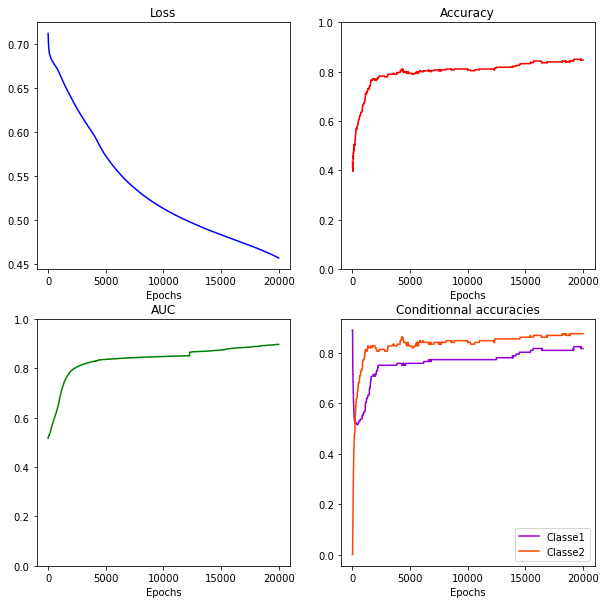

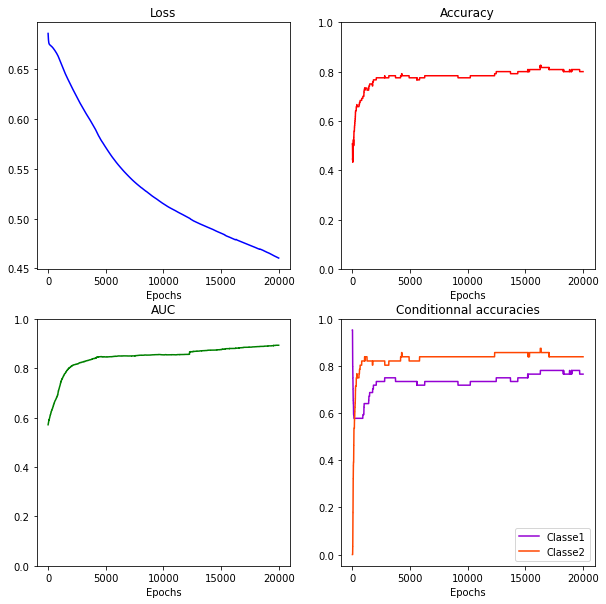

 60%|██████    | 3/5 [11:34<07:39, 229.91s/it]/home/guyomard/.conda/envs/calcul/lib/python3.6/site-packages/ipykernel_launcher.py:96: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


Epochs:   0%|          | 0/20000 [00:00<?, ?it/s]

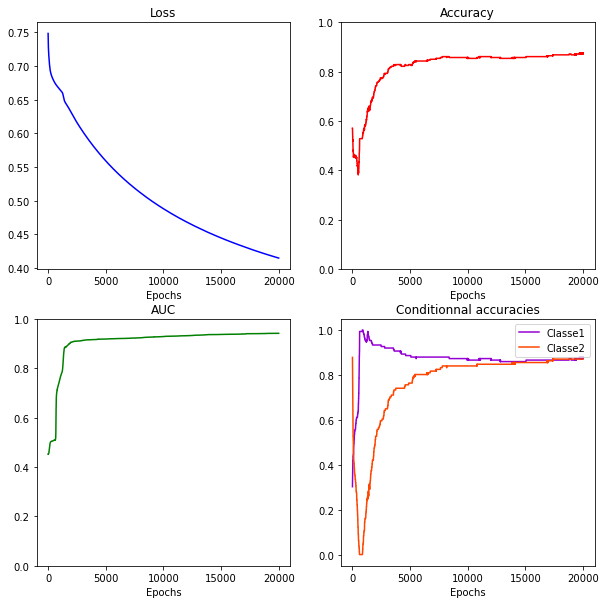

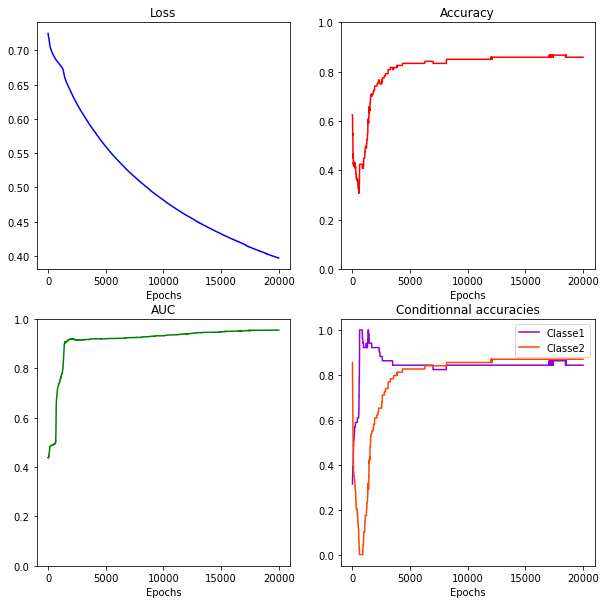

 80%|████████  | 4/5 [15:10<03:44, 224.48s/it]/home/guyomard/.conda/envs/calcul/lib/python3.6/site-packages/ipykernel_launcher.py:96: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


Epochs:   0%|          | 0/20000 [00:00<?, ?it/s]

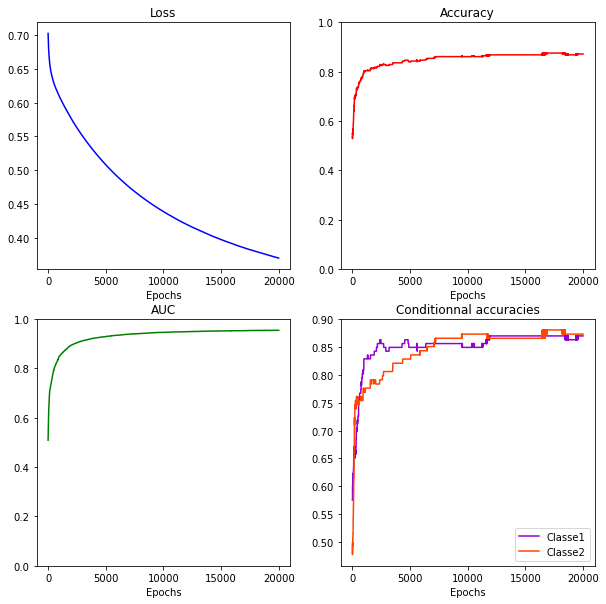

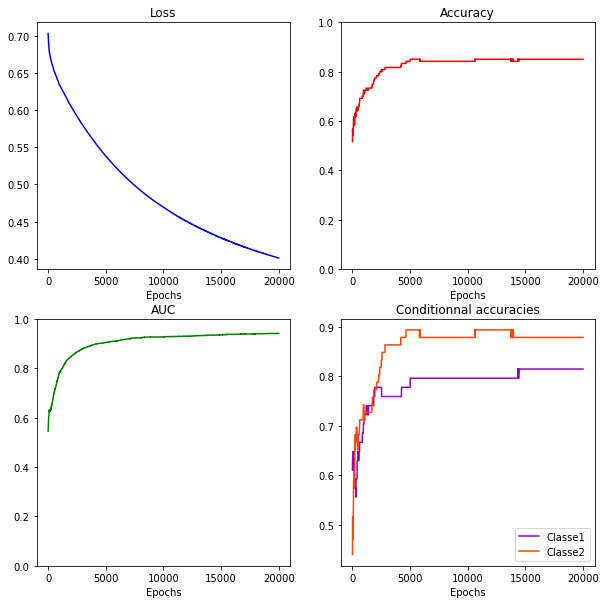

100%|██████████| 5/5 [18:46<00:00, 225.21s/it]

Performances par itération :
   acc_train  acc1_train  acc2_train  auc_train  acc_test  acc1_test  \
0   0.875000    0.864286    0.885714   0.954592  0.891667   0.883333   
1   0.778571    0.770833    0.786765   0.842576  0.725000   0.821429   
2   0.846429    0.816176    0.875000   0.896293  0.800000   0.765625   
3   0.875000    0.879195    0.870229   0.940878  0.858333   0.843137   
4   0.871429    0.869863    0.873134   0.953179  0.850000   0.814815   

   acc2_test  auc_test  
0   0.900000  0.963611  
1   0.640625  0.812779  
2   0.839286  0.892578  
3   0.869565  0.953964  
4   0.878788  0.940516  
Performance moyenne :
acc_train     0.849286
acc1_train    0.840071
acc2_train    0.858168
auc_train     0.917504
acc_test      0.825000
acc1_test     0.825668
acc2_test     0.825653
auc_test      0.912690
dtype: float64


In [7]:
np.random.seed(407)
SATURNN_models, SATURNN_iter, SATURNN_mean, SATURNN_std, SATURNN_times_fold, SATURNN_times = SATURNN_CrossValidation(X, Y, nb_neurons, r, normalisation, nb_folds, epoch, learning_rate, l2_reg)

#### Accuracies

- Accuracies over the 5-folds on both training and test sets

In [8]:
SATURNN_iter

,acc_train,acc1_train,acc2_train,auc_train,acc_test,acc1_test,acc2_test,auc_test
0,0.875000,0.864286,0.885714,0.954592,0.891667,0.883333,0.900000,0.963611
1,0.778571,0.770833,0.786765,0.842576,0.725000,0.821429,0.640625,0.812779
2,0.846429,0.816176,0.875000,0.896293,0.800000,0.765625,0.839286,0.892578
3,0.875000,0.879195,0.870229,0.940878,0.858333,0.843137,0.869565,0.953964
4,0.871429,0.869863,0.873134,0.953179,0.850000,0.814815,0.878788,0.940516


- Mean accuracies and standard deviation over the 5-folds

In [9]:
SATURNN_mean

acc_train     0.849286
acc1_train    0.840071
acc2_train    0.858168
auc_train     0.917504
acc_test      0.825000
acc1_test     0.825668
acc2_test     0.825653
auc_test      0.912690
dtype: float64

In [10]:
SATURNN_mean

acc_train     0.849286
acc1_train    0.840071
acc2_train    0.858168
auc_train     0.917504
acc_test      0.825000
acc1_test     0.825668
acc2_test     0.825653
auc_test      0.912690
dtype: float64

#### Computation Times

- Per fold

In [11]:
SATURNN_times_fold

[223.8431158065796,
 251.37176513671875,
 215.27921414375305,
 215.46247816085815,
 214.42603516578674]

- Mean and standard deviation of the computation times over the 5-folds

In [12]:
SATURNN_times

,mean,std
0,224.076522,15.730631


#### Estimated Splines of the best model over the 5-folds

The best model

In [13]:
best_model = SATURNN_models[np.argmax(SATURNN_iter['auc_test'])]

#### Plot the univariate splines estimated

Parameters :
- model : the SATURNN model
- nb_neurons : the number of neurons composing the SATURNN
- X : the features 
- normalisation : the normalization that was used to train the model
- Save_Fig : True if the figure must be saved
- path (Optional) : the path where to save the figure

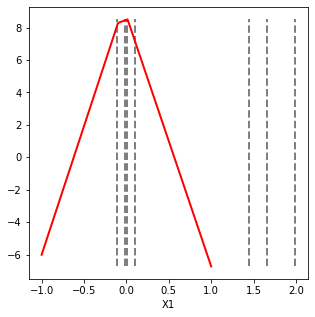

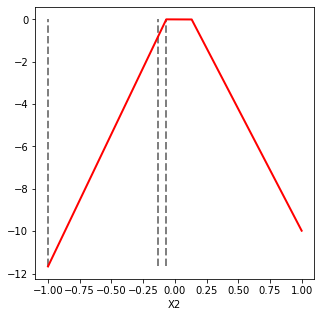

In [14]:
plot_splines_SATURNN(best_model.cpu(), nb_neurons, X, normalisation, Save_Fig=False)

#### Decision boundary (JUST FOR 2-D VARIABLES)

/home/guyomard/.conda/envs/calcul/lib/python3.6/site-packages/ipykernel_launcher.py:97: UserWarning: No contour levels were found within the data range.


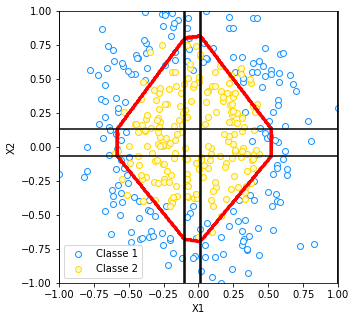

In [16]:
n_samples_x, n_samples_y = 300, 300
colors = ['black', 'green', 'blue', 'black']
path=[] 

extent_train = [np.min(X['X1']), np.max(X['X1']), np.min(X['X2']), np.max(X['X2'])]
outils_partition_train_NNMARS = Plot_partition_SATURNN(X[['X1', 'X2']], np.array(Y), normalisation, SATURNN_models[np.argmax(SATURNN_iter['auc_test'])].cpu().state_dict(), Save_Fig = True, name='SATURN')
meshgrid_train, Yhat_DL_train_NNMARS, paths_NNMARS = outils_partition_train_NNMARS.figure_partition()    

## Approximation by a Logistic Regression

To come...

## Approximation by a Kernel Logistic Regression

To come...